# Macroeconomic dashboard

Alex Wellman, June 2024


# European Functions

Import Packages

In [12]:
# Import packages

# from google.colab import files
# uploaded = files.upload()

import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

from fetcher import fetch_EU_data
from manipulations import apply_manipulation_and_save
from utils import list_dataset_names
from plotter import plot_dataset
from stats import create_country_stats_table

Saving stats.py to stats (2).py
Saving plotter.py to plotter (2).py
Saving utils.py to utils (2).py
Saving manipulations.py to manipulations (3).py
Saving fetcher.py to fetcher (3).py


## **Euro Data**

**Specify countries and initialize dic.**

In [13]:
euro_data = {}
euro_data_A = {}

countries = {
    'FR': 'France',
    'DE': 'Germany',
    'IT': 'Italy',
    'EA': 'Euro Area',
    'UK': 'UK',
    'ES': 'Spain',
    'NL': 'Netherlands',
}

**Pull the data and put into the dic**

In [14]:
base_url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/" #don't change this


fetch_EU_data(base_url, "gov_10q_ggdebt/Q.GD.S13.PC_GDP.{country_code}?format=TSV", countries, "Debt % of GDP", euro_data, euro_data_A, 'Q')

fetch_EU_data(base_url, "nasa_10_nf_tr/A.CP_MNAC.PAID.D41.S13.{country_code}?format=TSV", countries, "General Goverment Interest Paid", euro_data, euro_data_A, 'A')

fetch_EU_data(base_url, "namq_10_gdp/Q.CP_MNAC.NSA.B1GQ.{country_code}?format=TSV", countries, "Gross domestic product at market prices", euro_data, euro_data_A, 'Q')

fetch_EU_data(base_url, "nasa_10_nf_tr/A.CP_MNAC.RECV.B9.S13.{country_code}?format=TSV", countries, "Net lending (+) /net borrowing (-)", euro_data, euro_data_A, 'A')

fetch_EU_data(base_url, "ei_lmhr_m/M.PC_ACT.SA.LM-UN-T-LE25.{country_code}?format=TSV", countries, "Youth Unemployment Rate", euro_data, euro_data_A, 'M')

fetch_EU_data(base_url, "namq_10_lp_ulc/Q.I10.SCA.RLPR_HW.{country_code}?format=TSV", countries, "Labor Productivity Per Hour Worked", euro_data, euro_data_A, 'Q')

fetch_EU_data(base_url, "namq_10_lp_ulc/Q.I10.SCA.RLPR_Per.{country_code}?format=TSV", countries, "Labor Productivity Per Person Employed", euro_data, euro_data_A, 'Q')

fetch_EU_data(base_url, "ei_lmhr_m/M.PC_ACT.SA.LM-UN-T-TOT.{country_code}?format=TSV", countries, "Overall Unemployment Rate", euro_data, euro_data_A, 'M')

fetch_EU_data(base_url, "prc_hicp_midx/M.I05.CP00.{country_code}?format=TSV", countries, "HICP", euro_data, euro_data_A, 'M')

fetch_EU_data(base_url, "namq_10_gdp/Q.CLV_I05.NSA.B1G.{country_code}?format=TSV", countries, "Value Added", euro_data, euro_data_A, 'Q')

fetch_EU_data(base_url, "earn_ses_monthly/A.B-N.TOTAL.TOTAL.TOTAL.T.MEAN_E_EUR.{country_code}?format=TSV", countries, "Mean earnings, Business economy", euro_data, euro_data_A, 'A')

fetch_EU_data(base_url, "earn_ses_hourly/A.B-N.OC2.FT.TOTAL.T.MED_E_EUR.{country_code}?format=TSV", countries, "Hourly Earn", euro_data, euro_data_A, 'A')




Data not found for Euro Area (EA). Adding empty column.
Data not found for UK (UK). Adding empty column.
Data not found for Euro Area (EA). Adding empty column.
Data not found for Euro Area (EA). Adding empty column.
Data not found for Euro Area (EA). Adding empty column.
Data not found for Euro Area (EA). Adding empty column.
Data not found for Euro Area (EA). Adding empty column.
Data not found for Euro Area (EA). Adding empty column.


**Apply data manipulations and save as new entry in dic**

In [15]:
apply_manipulation_and_save("Youth Unemployment Rate", "yoy_change", "Youth Unemployment Rate YOY", euro_data)
apply_manipulation_and_save("HICP", "yoy_change", "HICP YOY Change", euro_data)

In [16]:
# Save example
# multiplied = dataset1 * dataset2

# Save the results back to the dictionary
# euro_data['multiplied_result'] = multiplied


**Policy Note Data Sets**

In [17]:
# Adjust units
euro_data_A['Gross domestic product at market prices'] = euro_data_A.get('Gross domestic product at market prices') / 1000
euro_data_A['Net lending (+) /net borrowing (-)'] = euro_data_A.get('Net lending (+) /net borrowing (-)') / 1000
euro_data_A['General Goverment Interest Paid'] = euro_data_A.get('General Goverment Interest Paid') / 1000

num = euro_data_A.get('General Goverment Interest Paid')
denom = euro_data_A.get('Gross domestic product at market prices')
euro_data_A['Interest to Debt']= (num/denom)*100

**List available datasets**

In [18]:
list_dataset_names(euro_data)


Datasets available:
Debt % of GDP
General Goverment Interest Paid
Gross domestic product at market prices
Net lending (+) /net borrowing (-)
Youth Unemployment Rate
Labor Productivity Per Hour Worked
Labor Productivity Per Person Employed
Overall Unemployment Rate
HICP
Value Added
Mean earnings, Business economy
Hourly Earn
Youth Unemployment Rate YOY
HICP YOY Change


In [19]:
list_dataset_names(euro_data_A)

Datasets available:
Debt % of GDP
General Goverment Interest Paid
Gross domestic product at market prices
Net lending (+) /net borrowing (-)
Youth Unemployment Rate
Labor Productivity Per Hour Worked
Labor Productivity Per Person Employed
Overall Unemployment Rate
HICP
Value Added
Mean earnings, Business economy
Hourly Earn
Interest to Debt


**Plot Data**

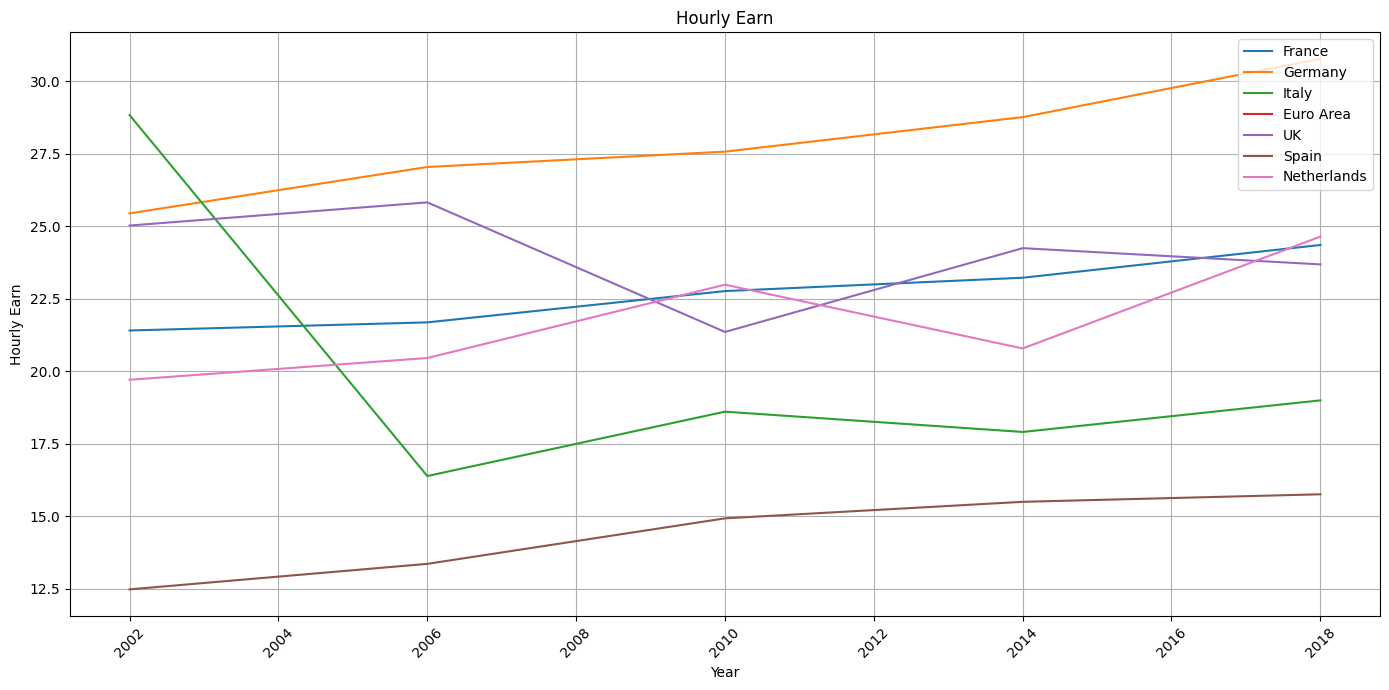

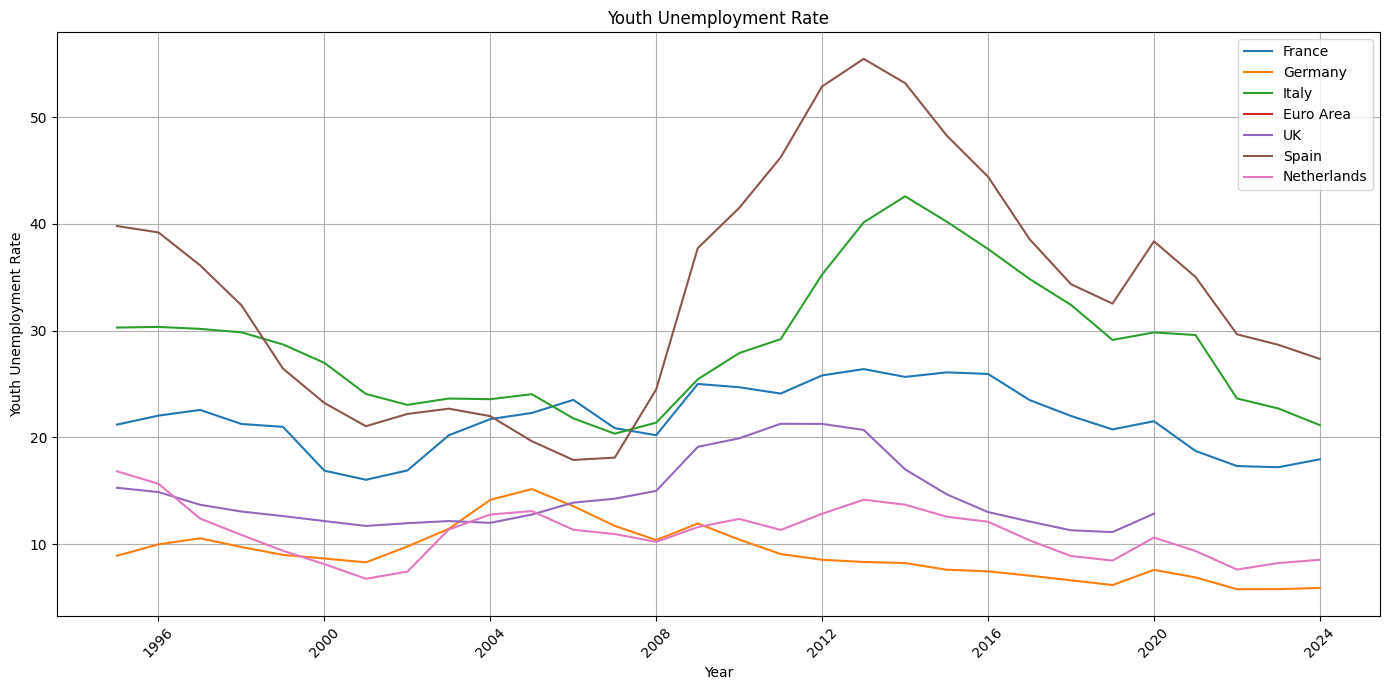

Dataset 'Youth Unemployment Rate YOY' not found in the dictionary.
Dataset 'HICP YOY Change' not found in the dictionary.


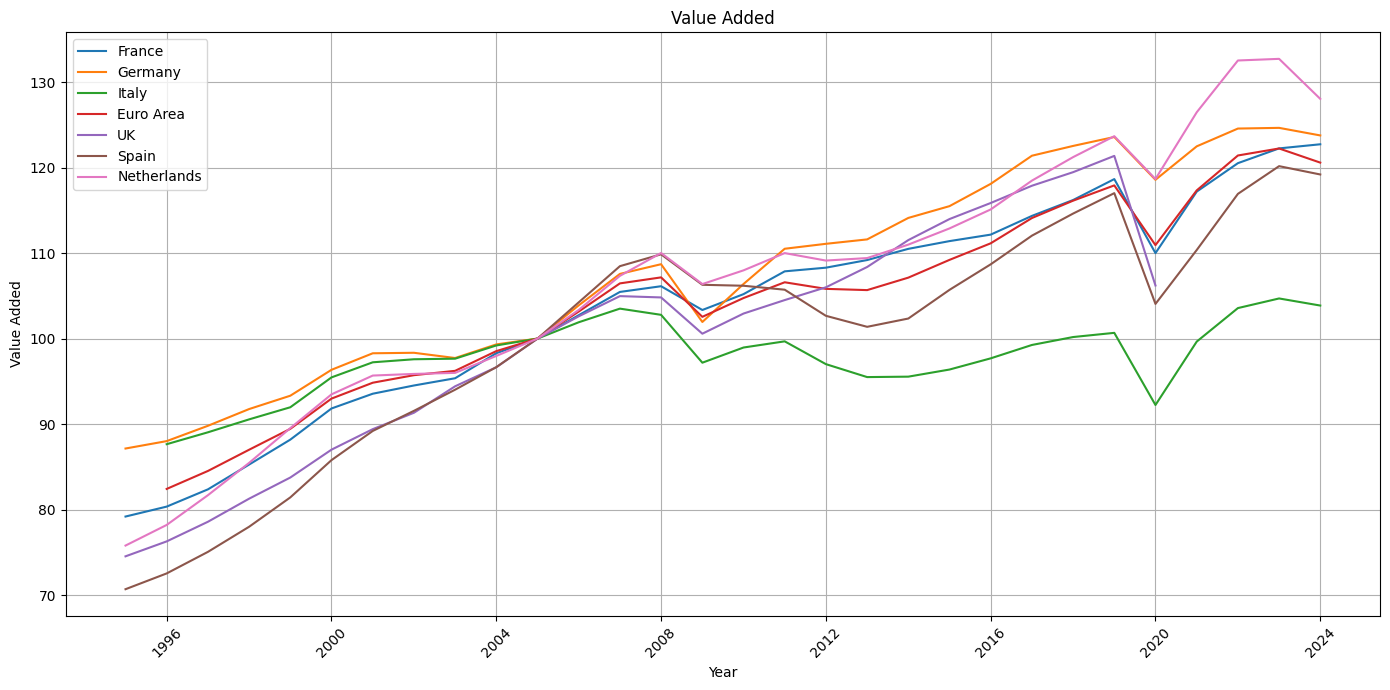

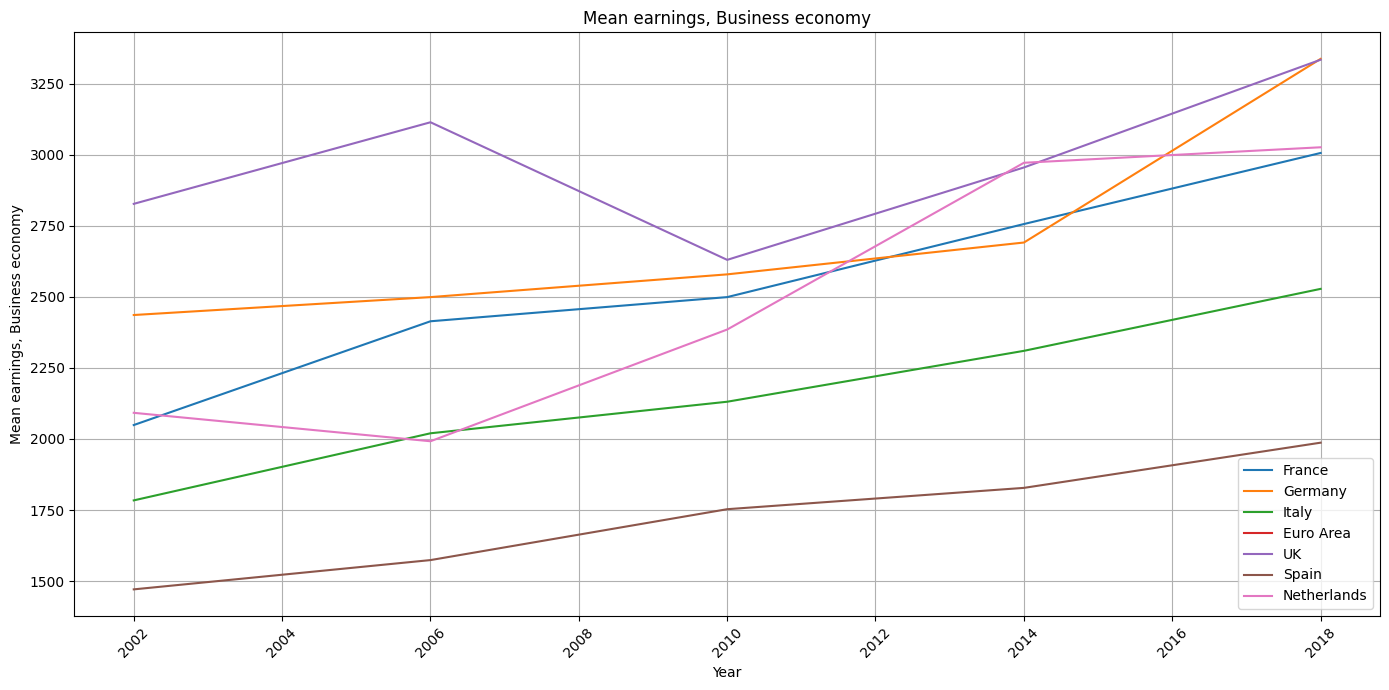

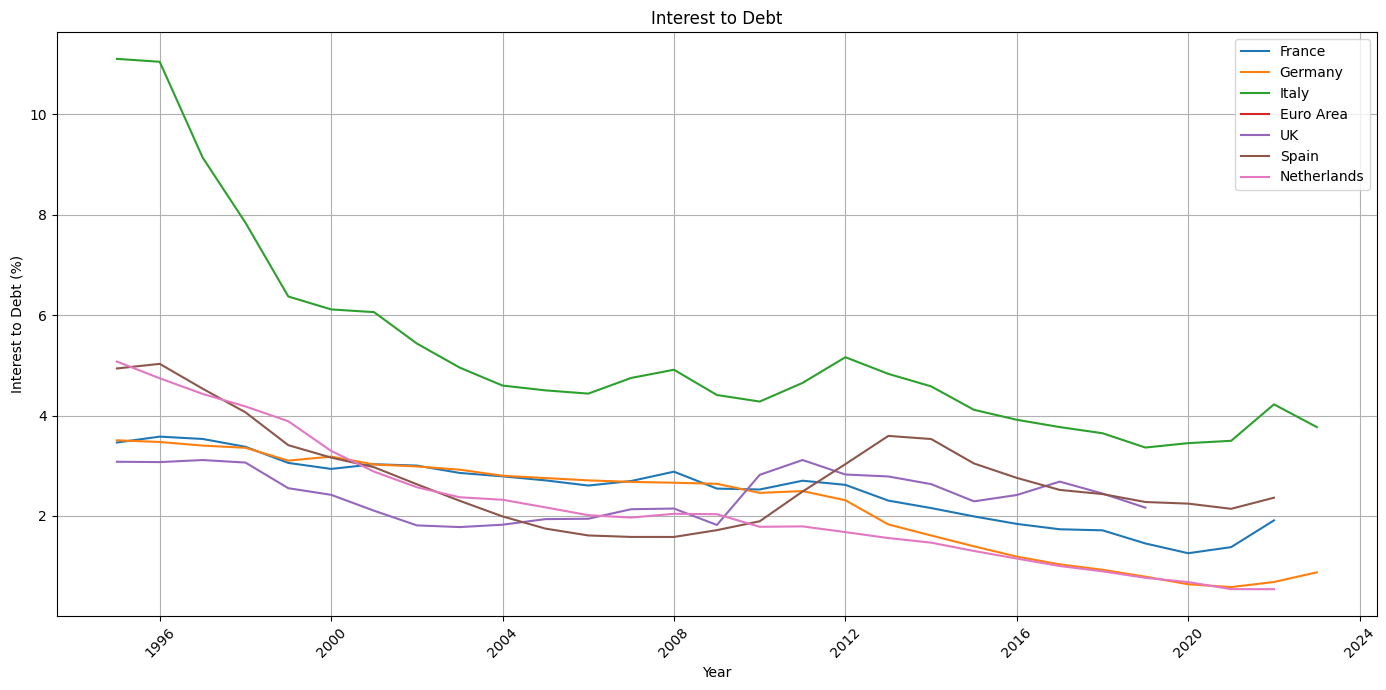

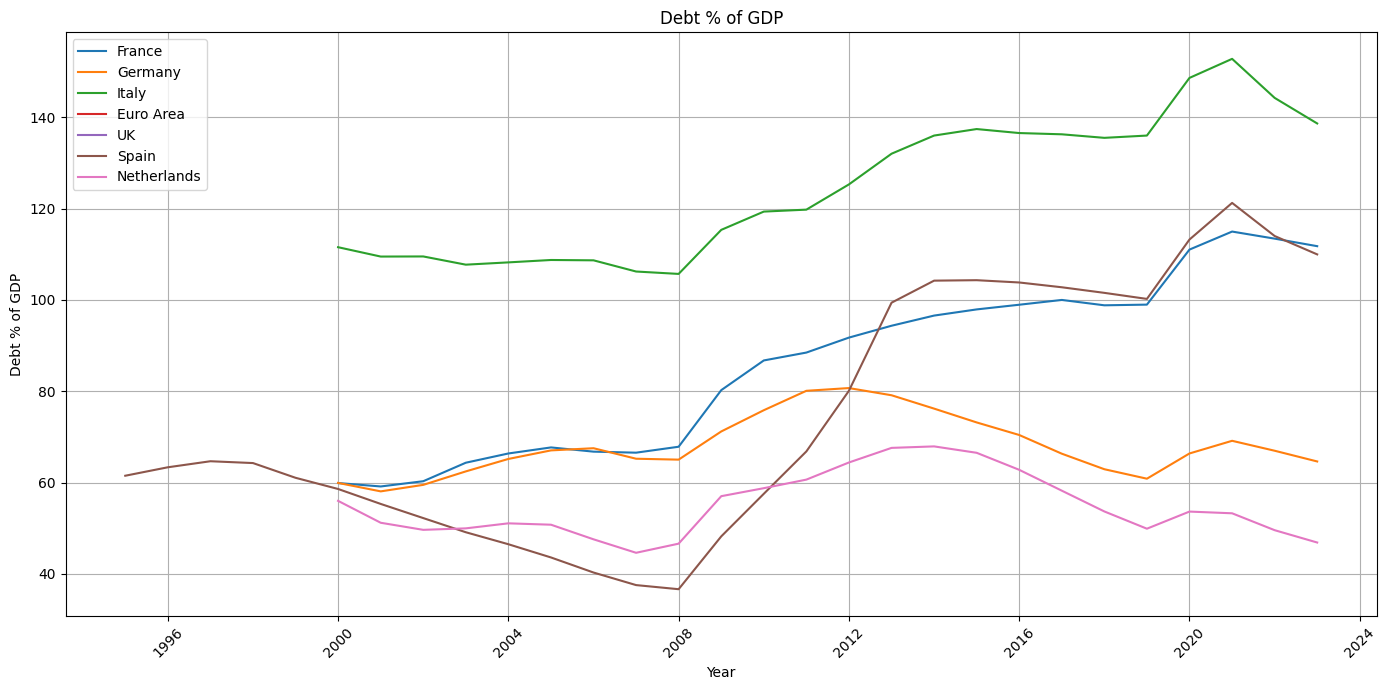

In [20]:
plot_dataset(euro_data_A, 'Hourly Earn', 'Hourly Earn', 'Year', 'Hourly Earn')
plot_dataset(euro_data_A, 'Youth Unemployment Rate', 'Youth Unemployment Rate', 'Year', 'Youth Unemployment Rate')
plot_dataset(euro_data_A, 'Youth Unemployment Rate YOY', 'Youth Unemployment Rate YoY', 'Year', 'Youth Unemployment Rate')
plot_dataset(euro_data_A, 'HICP YOY Change', 'HICP YOY Change', 'Year', 'HICP YOY Change')
plot_dataset(euro_data_A, 'Value Added', 'Value Added', 'Year', 'Value Added')
plot_dataset(euro_data_A, 'Mean earnings, Business economy', 'Mean earnings, Business economy', 'Year', 'Mean earnings, Business economy')

plot_dataset(euro_data_A, 'Interest to Debt', 'Interest to Debt', 'Year', 'Interest to Debt (%)')
plot_dataset(euro_data_A, 'Debt % of GDP' , 'Debt % of GDP', 'Year', 'Debt % of GDP')



**Create Table**

In [21]:
create_country_stats_table(euro_data,'Youth Unemployment Rate YOY')


,Country,Latest Value,Date of Latest Value,Previous Year Value,Date of Previous Year Value
0,France,5.325444,2024-05-01,-5.586592,2023-05-01
1,Germany,1.754386,2024-05-01,0.000000,2023-05-01
2,Italy,-14.767932,2024-05-01,8.219178,2023-05-01
3,Euro Area,NaN,2024-05-01,NaN,2023-05-01
4,UK,0.000000,2024-05-01,0.000000,2023-05-01
5,Spain,-5.693950,2024-05-01,-0.706714,2023-05-01
6,Netherlands,2.439024,2024-05-01,13.888889,2023-05-01


In [22]:
create_country_stats_table(euro_data,'HICP YOY Change')


,Country,Latest Value,Date of Latest Value,Previous Year Value,Date of Previous Year Value
0,France,2.591157,2024-05-01,6.011262,2023-05-01
1,Germany,2.721088,2024-05-01,6.290672,2023-05-01
2,Italy,0.825309,2024-05-01,7.943578,2023-05-01
3,Euro Area,2.561102,2024-05-01,6.107093,2023-05-01
4,UK,0.000000,2024-05-01,0.000000,2023-05-01
5,Spain,3.774243,2024-05-01,2.937163,2023-05-01
6,Netherlands,2.678928,2024-05-01,6.827081,2023-05-01
